In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


In [11]:
train=pd.read_csv('/train.csv')


In [25]:
# Ortalama (Mean)
print("Ortalama Yaş:", train['Age'].mean())

# Medyan (Median)
print("Medyan Yaş:", train["Age"].median())

# Mod (En sık tekrar eden değer)
print("En sık görülen Yaş:", train["Age"].mode()[0])

# Standart Sapma (Standard Deviation)
print("Yaş Standart Sapması:", train["Age"].std())

# Varyans (Variance)
print("Yaş Varyansı:", train["Age"].var())

# Minimum ve Maksimum
print("Minimum Yaş:", train["Age"].min())
print("Maksimum Yaş:", train["Age"].max())

# Çeyreklikler (Quartiles)
print("1. Çeyrek (Q1):", train["Age"].quantile(0.25))
print("3. Çeyrek (Q3):", train["Age"].quantile(0.75))

Ortalama Yaş: 39.379706267323684
Medyan Yaş: 40.0
En sık görülen Yaş: 39
Yaş Standart Sapması: 15.114963699738569
Yaş Varyansı: 228.46212764441466
Minimum Yaş: 7
Maksimum Yaş: 85
1. Çeyrek (Q1): 27.0
3. Çeyrek (Q3): 51.0


In [49]:
train.isnull().sum() ##Boş Dataların toplamını Getirme :

,0
Unnamed: 0,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0


In [50]:

    # Sayısal değişkenler için istatiksel değerler
    num_stats = print(train.select_dtypes('number').agg(['mean', 'median', 'std', 'min', 'max']))

    # Kategorik değişkenler için istatiksel değerler
    cat_stats = print(train.select_dtypes('object').agg(['count', 'nunique', 'mode']))



           Unnamed: 0             id        Age  Flight Distance  \
mean     51951.500000   64924.210502  39.379706      1189.448375   
median   51951.500000   64856.500000  40.000000       843.000000   
std      29994.645522   37463.812252  15.114964       997.147281   
min          0.000000       1.000000   7.000000        31.000000   
max     103903.000000  129880.000000  85.000000      4983.000000   

        Inflight wifi service  Departure/Arrival time convenient  \
mean                 2.729683                           3.060296   
median               3.000000                           3.000000   
std                  1.327829                           1.525075   
min                  0.000000                           0.000000   
max                  5.000000                           5.000000   

        Ease of Online booking  Gate location  Food and drink  \
mean                  2.756901       2.976883        3.202129   
median                3.000000       3.000000       

ValueError: cannot combine transform and aggregation operations

In [17]:
# Sadece eksik veri içeren satırları gösterme :
missing_rows = train[train.isna().any(axis=1)]
print(missing_rows)

        Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
213            213   49608  Female     Loyal Customer   38  Business travel   
1124          1124   73442    Male     Loyal Customer   53  Personal Travel   
1529          1529   71178    Male     Loyal Customer   39  Business travel   
2004          2004   72940  Female  disloyal Customer   26  Business travel   
2108          2108  116374  Female     Loyal Customer   24  Personal Travel   
...            ...     ...     ...                ...  ...              ...   
102067      102067   36729    Male     Loyal Customer   49  Personal Travel   
102384      102384   71241    Male     Loyal Customer   58  Business travel   
102552      102552   27684  Female  disloyal Customer   29  Business travel   
102960      102960   36787    Male     Loyal Customer   58  Business travel   
103540      103540   45022  Female     Loyal Customer   33  Personal Travel   

           Class  Flight Distance  Inflight wifi se

In [41]:
# Sayısal değişkenleri seçme
numeric_cols = train.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Sayısal değişkenler:", numeric_cols)



Sayısal değişkenler: ['Unnamed: 0', 'id', 'Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


In [42]:
def detect_outliers_zscore(data, threshold=3):
    z_scores = stats.zscore(data)
    return np.abs(z_scores) > threshold

# Tüm sayısal değişkenler için Z-skoru uygulama
z_outliers = pd.DataFrame()
for col in numeric_cols:
    z_outliers[col] = detect_outliers_zscore(train[col])

print("Z-skoru ile bulunan aykırı değer sayıları:")
print(z_outliers.sum())

Z-skoru ile bulunan aykırı değer sayıları:
Unnamed: 0                              0
id                                      0
Age                                    17
Flight Distance                        58
Inflight wifi service                   0
Departure/Arrival time convenient       0
Ease of Online booking                  0
Gate location                           0
Food and drink                          0
Online boarding                         0
Seat comfort                            0
Inflight entertainment                  0
On-board service                        0
Leg room service                        0
Baggage handling                        0
Checkin service                         0
Inflight service                        3
Cleanliness                             0
Departure Delay in Minutes           2222
Arrival Delay in Minutes                0
dtype: int64


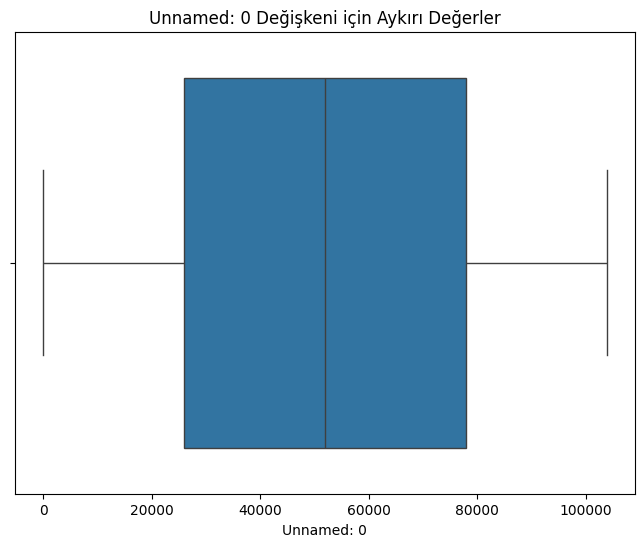

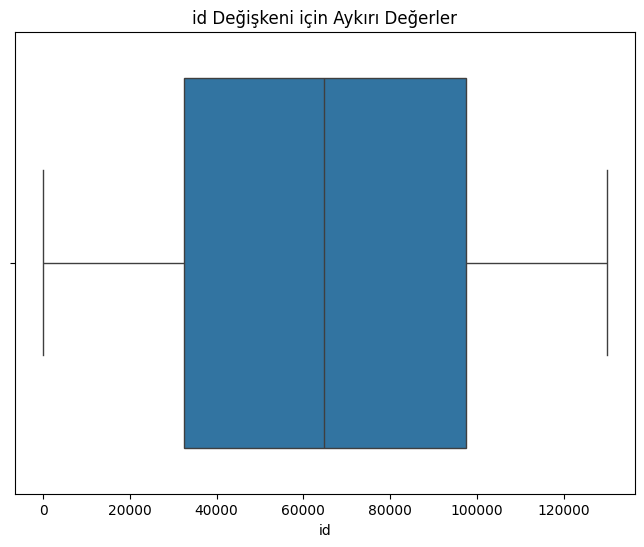

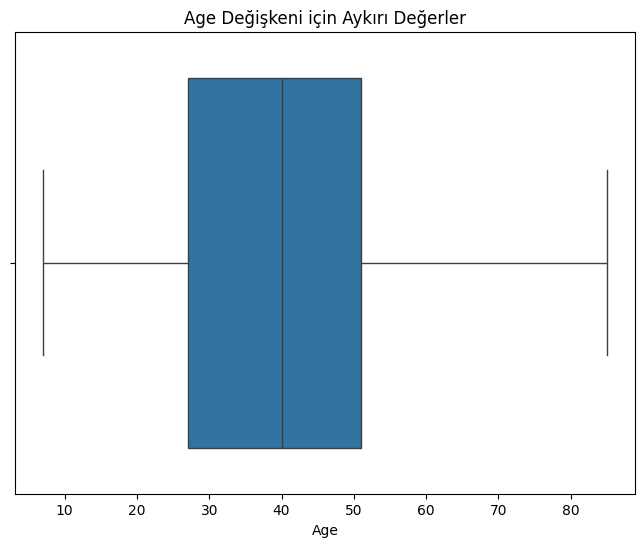

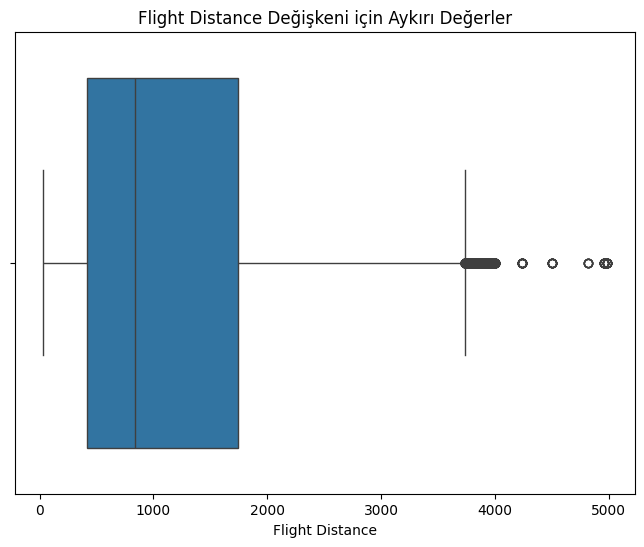

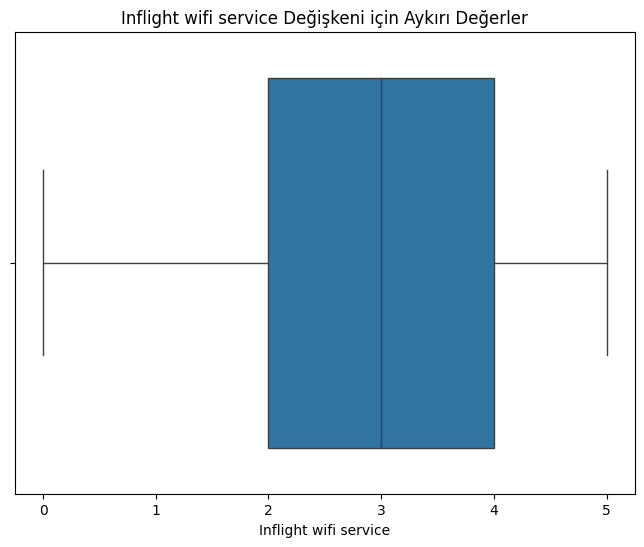

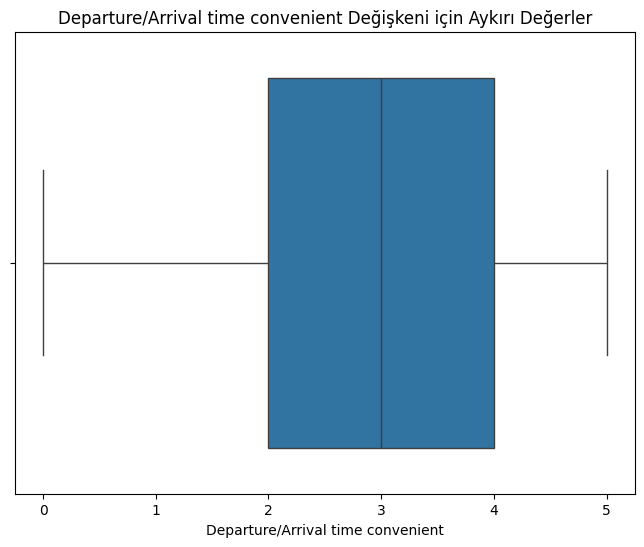

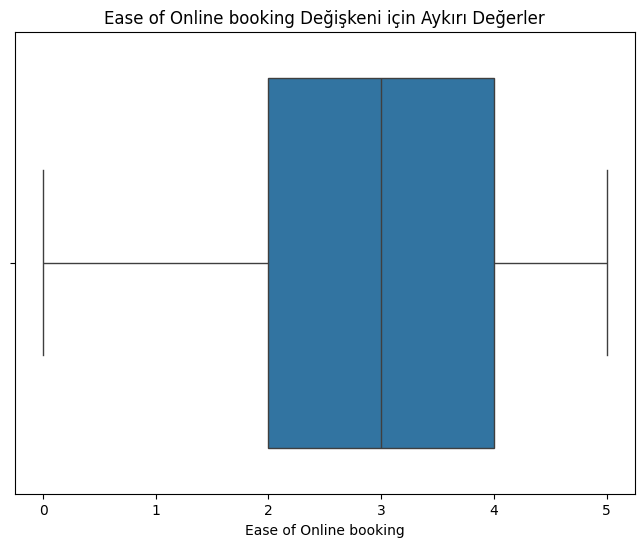

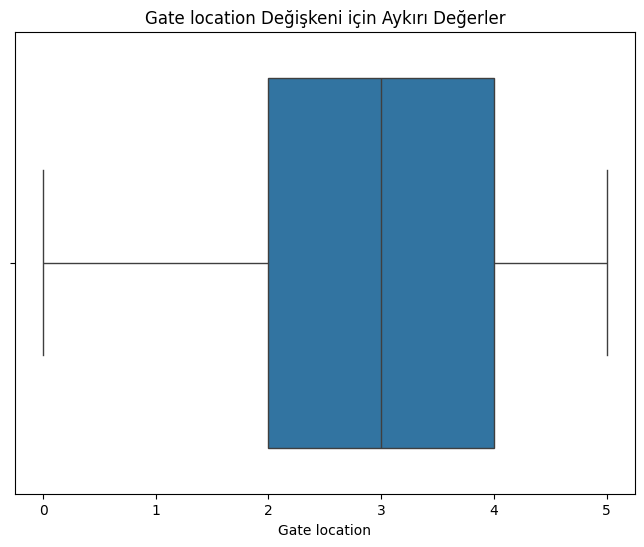

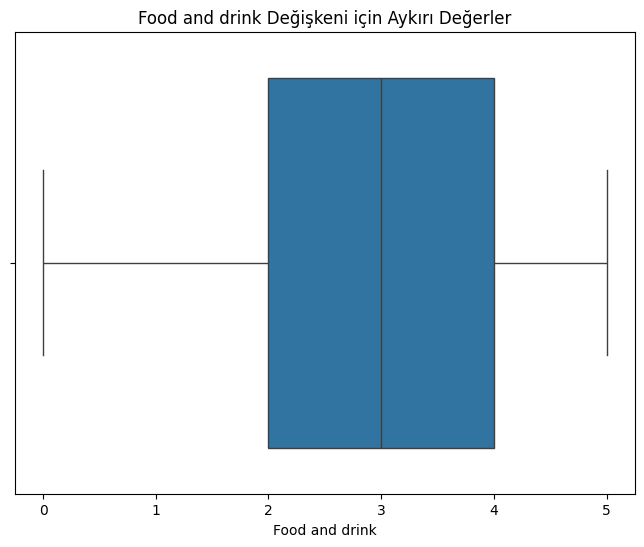

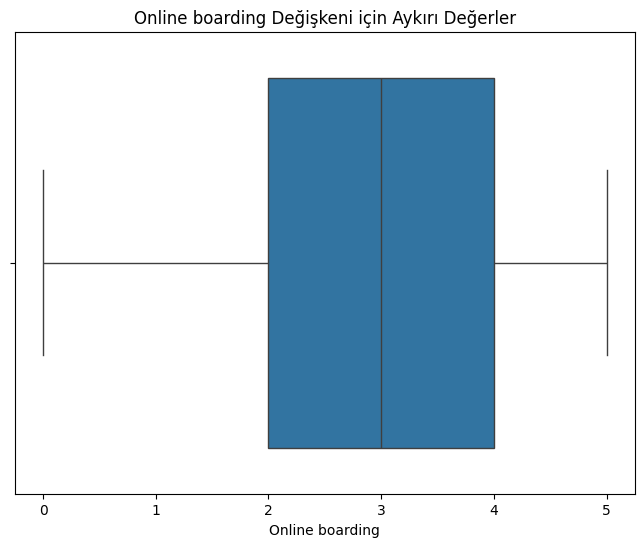

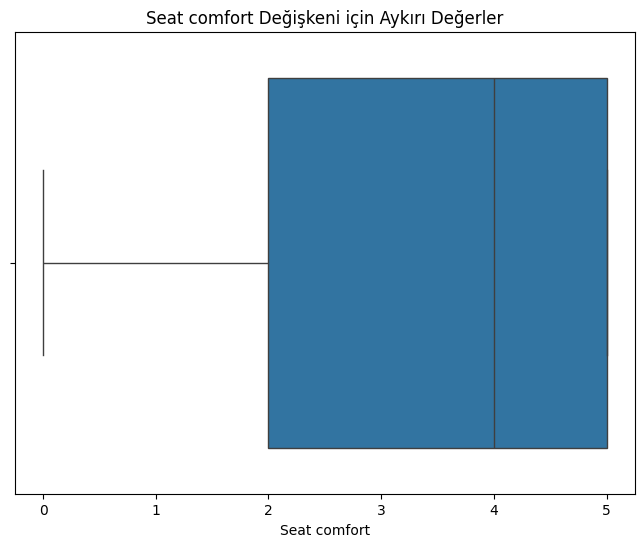

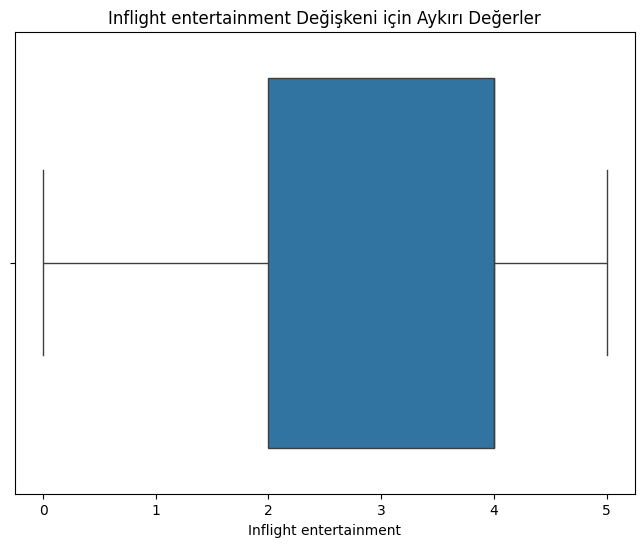

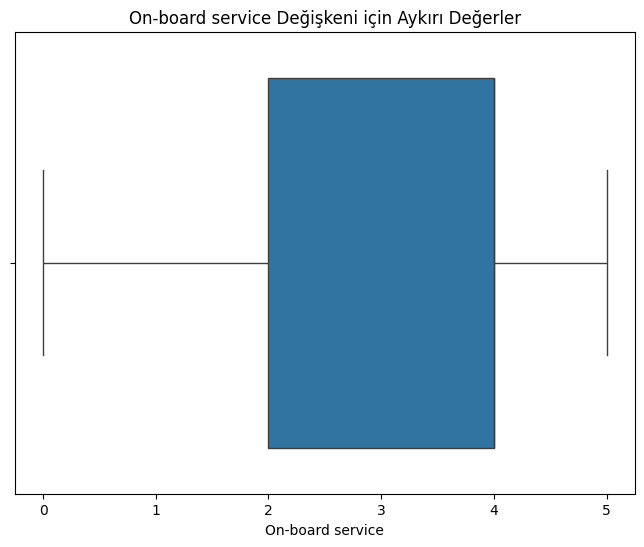

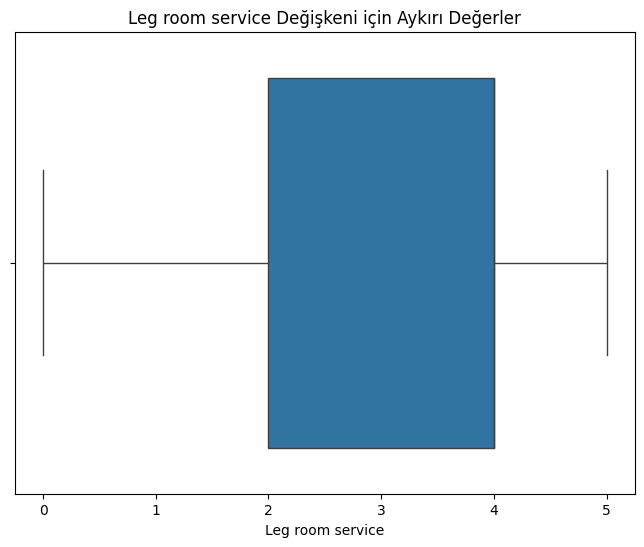

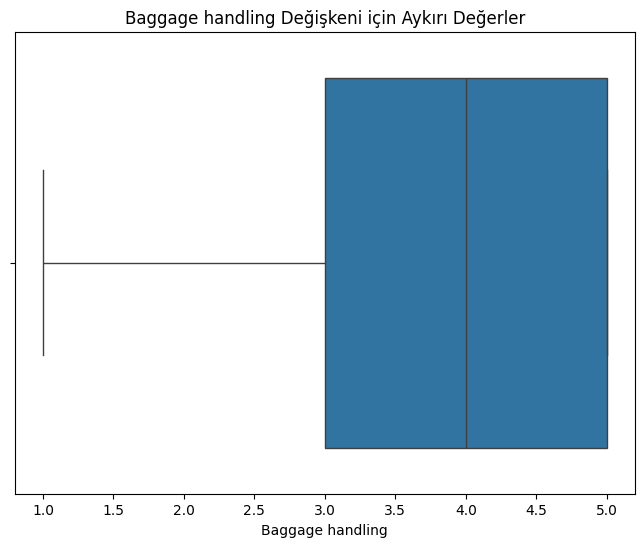

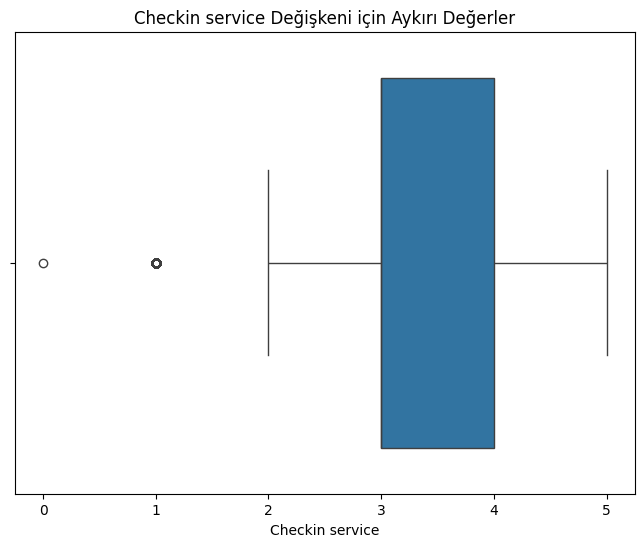

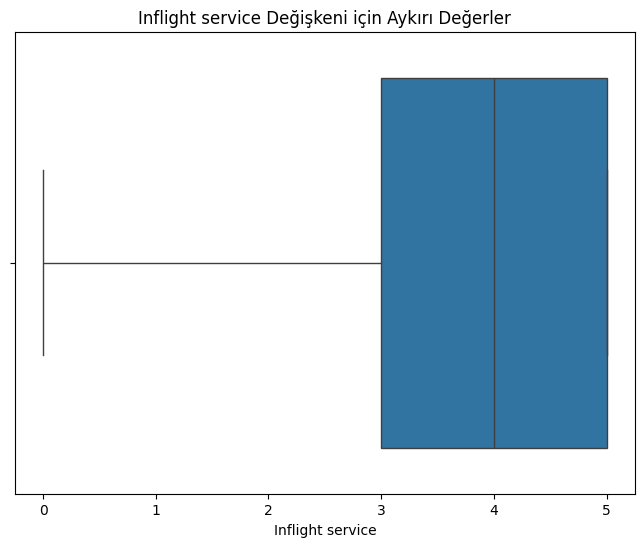

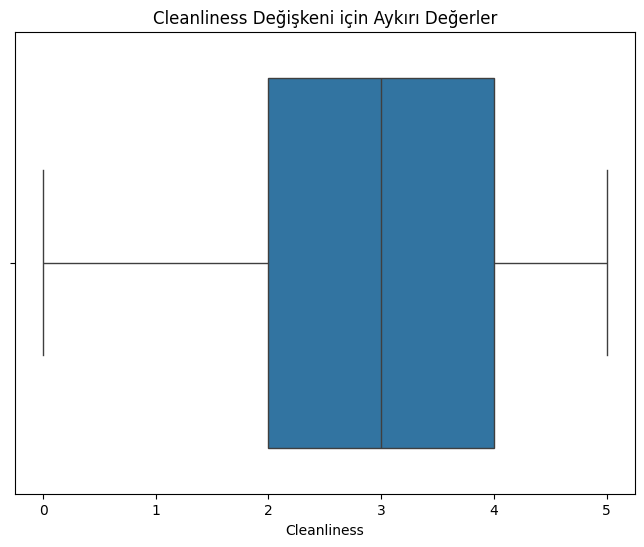

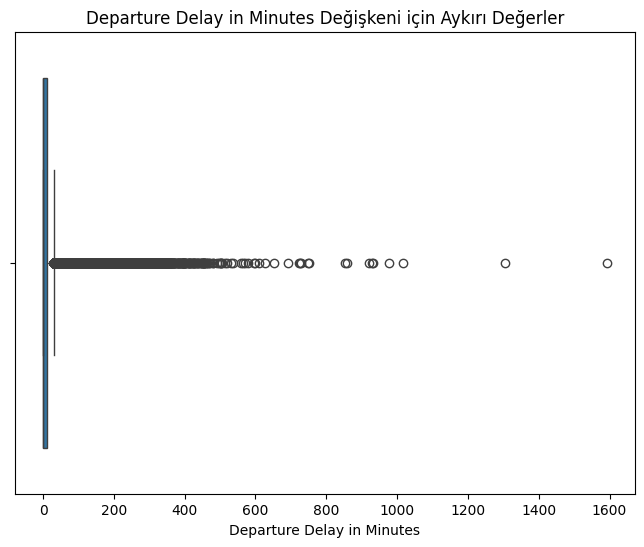

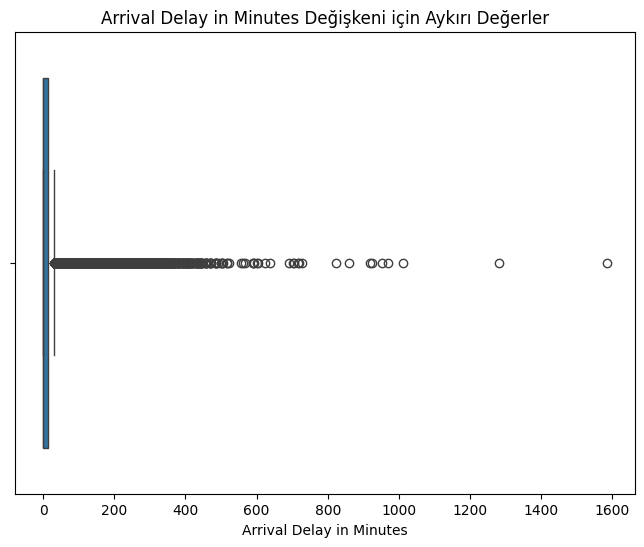

In [44]:
# Her değişken için ayrı aykırı değer bulma
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=train[col])
    plt.title(f'{col} Değişkeni için Aykırı Değerler')
    plt.show()

In [52]:
# Görselleştirme ayarları
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

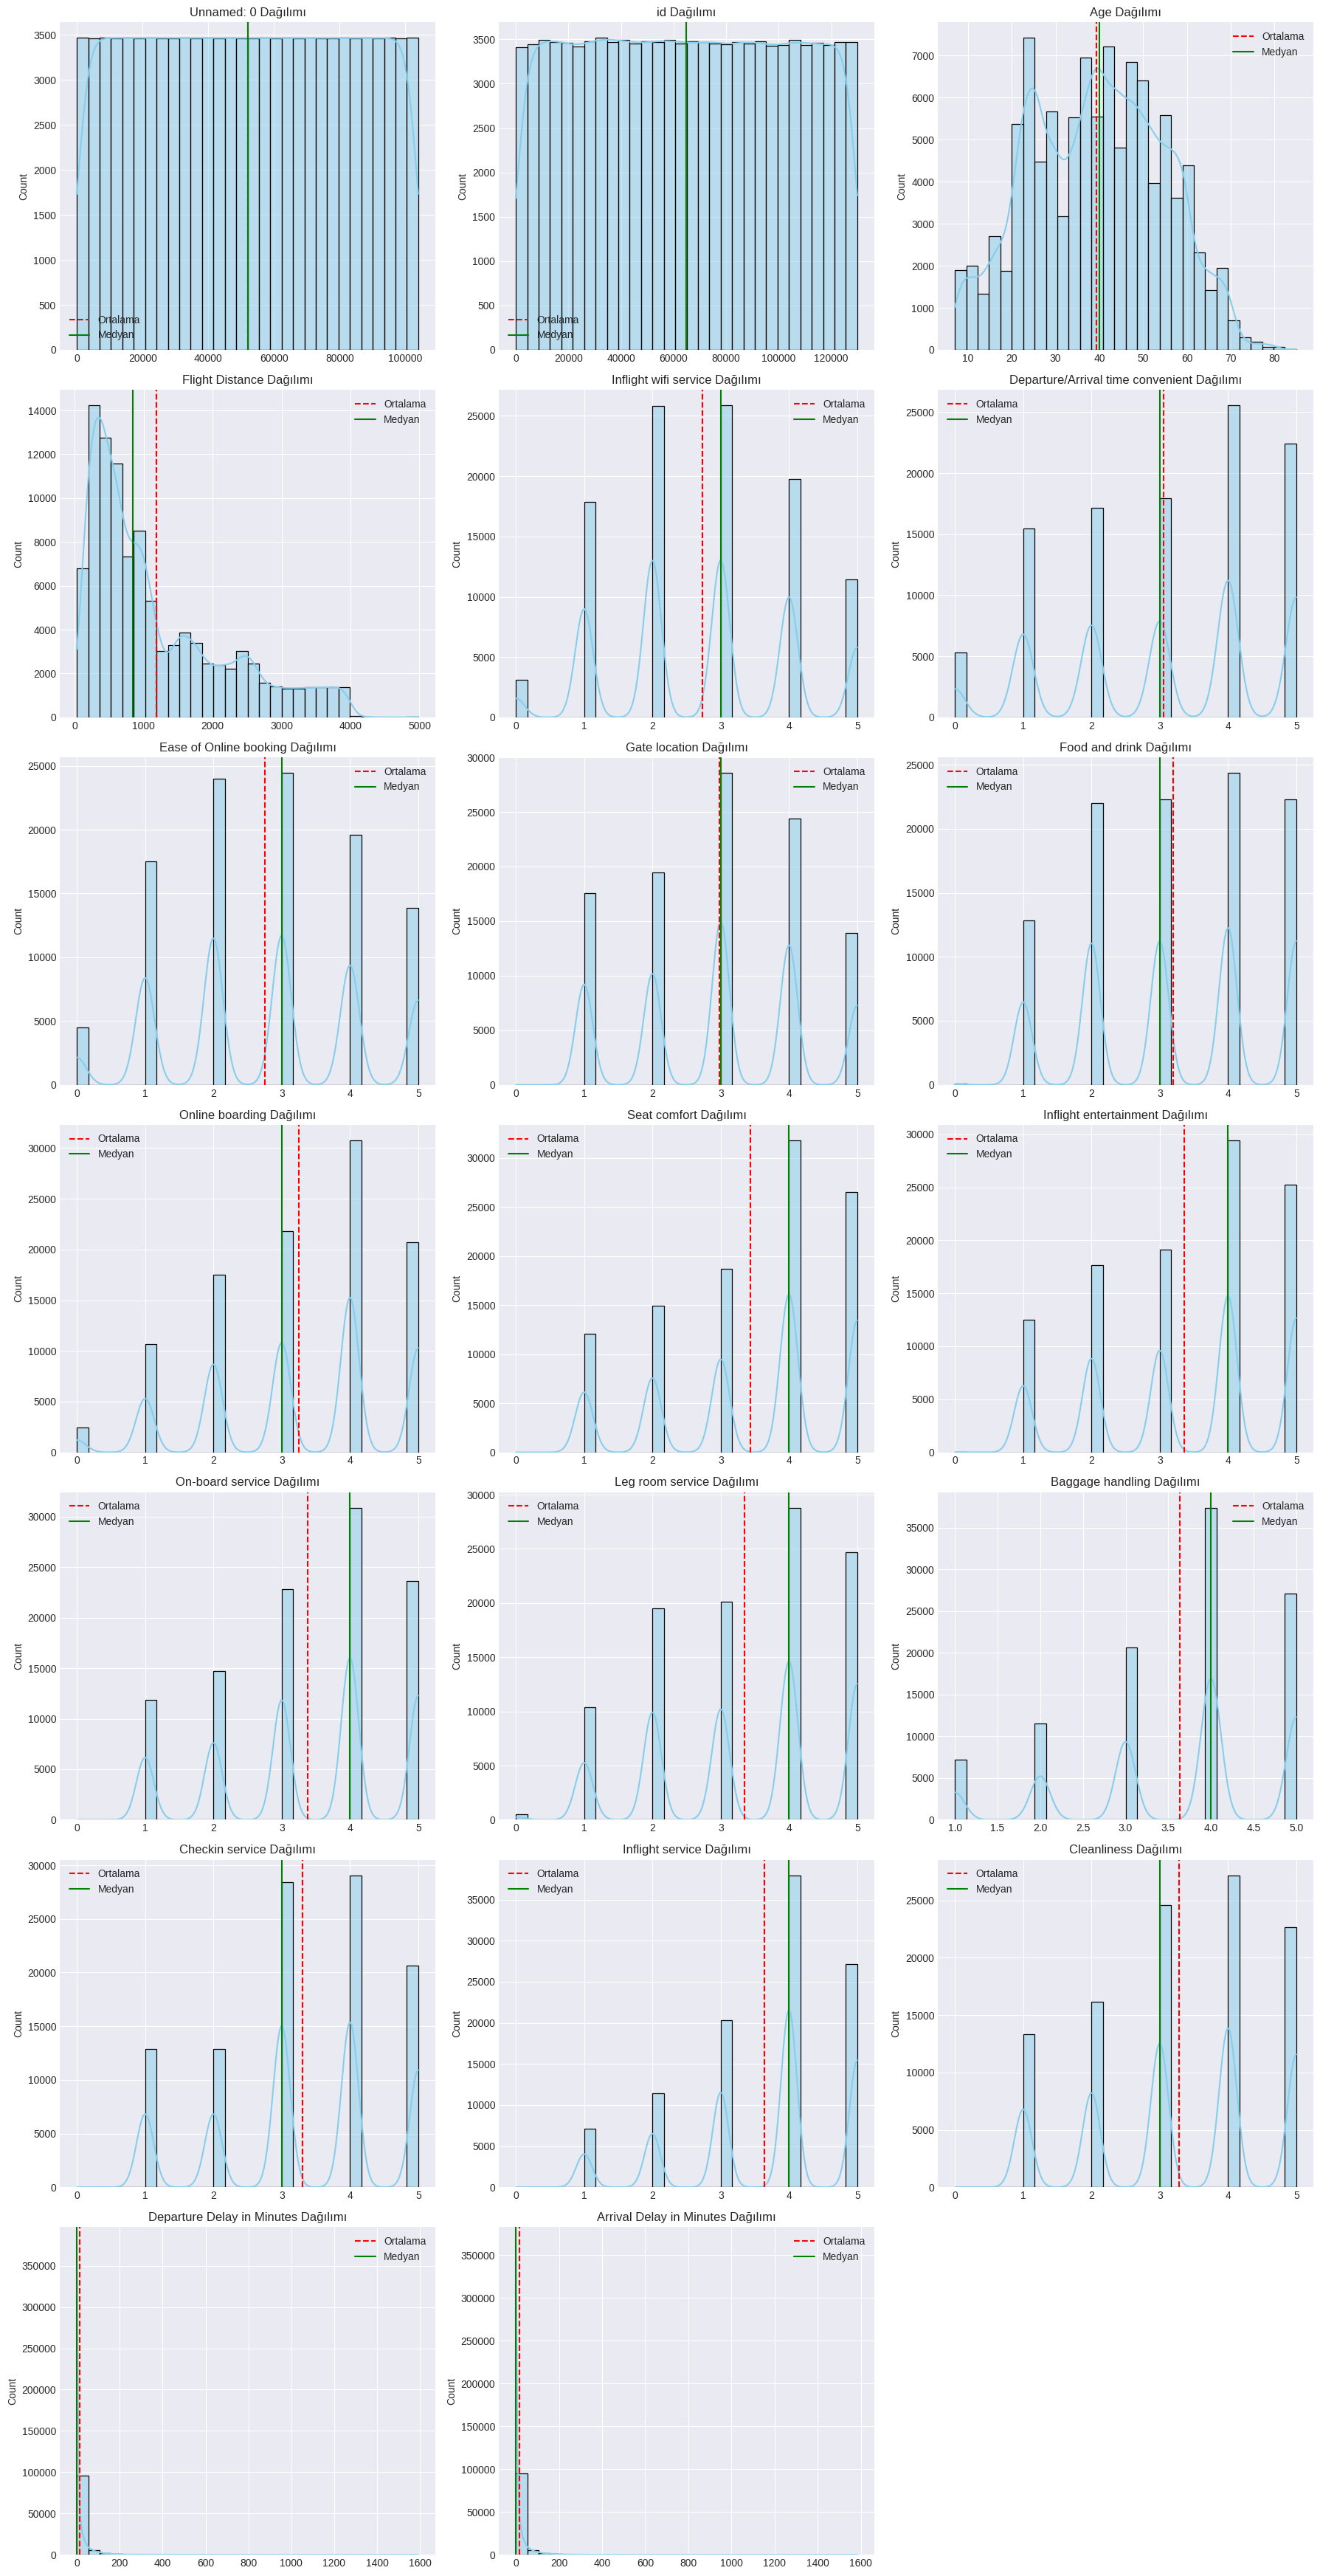

In [53]:
def plot_numeric_distributions(df, numeric_cols):
    n_cols = 3
    n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

    plt.figure(figsize=(18, 5*n_rows))

    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(n_rows, n_cols, i)

        # Histogram ve KDE
        sns.histplot(df[col], kde=True, bins=30, color='skyblue')
        plt.axvline(df[col].mean(), color='red', linestyle='--', label='Ortalama')
        plt.axvline(df[col].median(), color='green', linestyle='-', label='Medyan')

        plt.title(f'{col} Dağılımı', fontsize=12)
        plt.xlabel('')
        plt.legend()

    plt.tight_layout()
    plt.show()

# Sayısal değişkenleri seçme
numeric_cols = train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Grafikleri çizdirme
plot_numeric_distributions(train, numeric_cols)

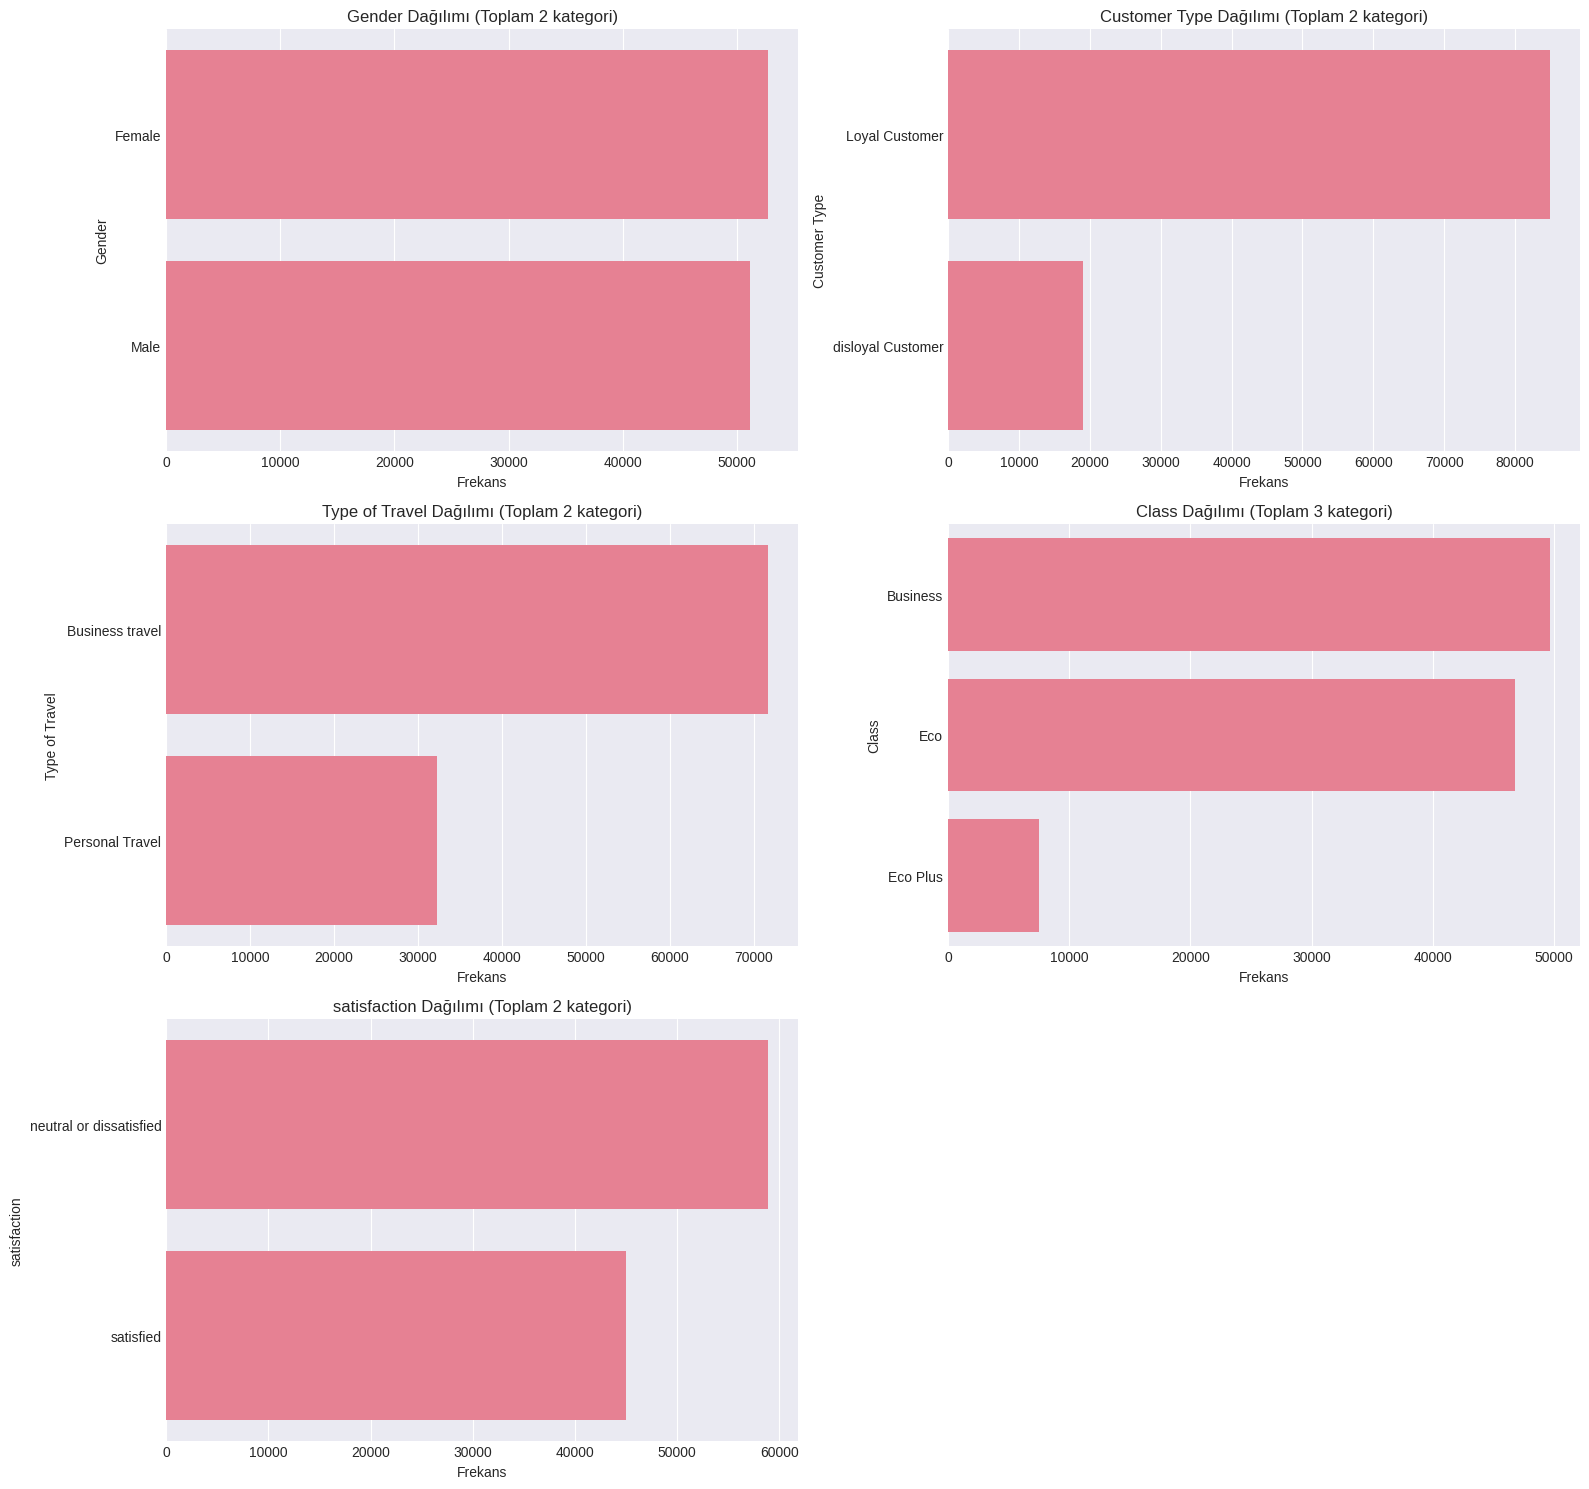

In [54]:
def plot_categorical_distributions(df, cat_cols, max_unique=20):
    n_cols = 2
    n_rows = (len(cat_cols) + n_cols - 1) // n_cols

    plt.figure(figsize=(16, 5*n_rows))

    for i, col in enumerate(cat_cols, 1):
        plt.subplot(n_rows, n_cols, i)

        # Eşsiz değer sayısına göre grafik seçimi
        unique_count = df[col].nunique()

        if unique_count <= max_unique:
            # Sütun grafiği
            sns.countplot(y=df[col], order=df[col].value_counts().index)
            plt.title(f'{col} Dağılımı (Toplam {unique_count} kategori)', fontsize=12)
            plt.xlabel('Frekans')
        else:
            # Çok fazla kategori varsa değer sayılarını göster
            value_counts = df[col].value_counts()
            plt.barh(value_counts.index[:max_unique], value_counts.values[:max_unique])
            plt.title(f'{col} - İlk {max_unique} Kategori (Toplam {unique_count})', fontsize=12)
            plt.xlabel('Frekans')

    plt.tight_layout()
    plt.show()

# Kategorik değişkenleri seçme
cat_cols = train.select_dtypes(include=['object', 'category']).columns.tolist()

if cat_cols:
    plot_categorical_distributions(train, cat_cols)
else:
    print("Kategorik değişken bulunamadı.")